# Programmatic access to geospatial layers from the decamillenial flood project

The relative and absolute changes in 1,000 and 10,000 flood frequency values have been computed for over 500 watersheds using two climate projection large ensembles, CESM1 and CanESM2 (see [project overview](../projects/cruesdeca.rst) for more info). These results are available on the PAVICS GeoServer, and this notebook shows how to get access to those files from a programming environment.



In [1]:
%matplotlib inline

import json

import geopandas as gpd
from owslib.wfs import WebFeatureService

# Connect to Ouranos' GeoServer WFS service.
url = "https://pavics.ouranos.ca/geoserver/wfs"
wfs = WebFeatureService(url, version="2.0.0")

typename = "public:decamillenial_flood_CC"
layer = wfs.contents[typename]
print(layer.abstract)

Climate change factors for 1,000 and 10,000-year design floods estimated from the CESM1 and CanESM2 Large Ensembles and the GR4J-Cemaneige hydrological model over the period 2080-2100 compared to 1990-2010.


In the next cell, we'll download the data in the GeoJSON format, load it into a dictionary and instantiate a GeoDataFrame. 

In [2]:
typename = "public:decamillenial_flood_CC"
txt = wfs.getfeature(typename=typename, outputFormat="json").read()
data = json.loads(txt.decode())
gdf = gpd.GeoDataFrame.from_features(data)

Let's take a look at the top of the table. 

In [3]:
gdf.head()

,geometry,ID,name,watershed_area,NSE,CESM1_PWM_T100_MUL,CESM1_PWM_T100_P75_MUL,CESM1_PWM_T100_P90_MUL,CESM1_PWM_T100_P95_MUL,CESM1_PWM_T100_P99_MUL,...,CanESM2_PWM_T1000_ADD,CanESM2_PWM_T1000_P75_ADD,CanESM2_PWM_T1000_P90_ADD,CanESM2_PWM_T1000_P95_ADD,CanESM2_PWM_T1000_P99_ADD,CanESM2_PWM_T10000_ADD,CanESM2_PWM_T10000_P75_ADD,CanESM2_PWM_T10000_P90_ADD,CanESM2_PWM_T10000_P95_ADD,CanESM2_PWM_T10000_P99_ADD
0,"POLYGON ((-111.39170 54.17100, -111.42500 54.1...",06CD002,CHURCHILL RIVER ABOVE OTTER RAPIDS,119000.0,0.715358,-57.343822,-54.547526,-51.714055,-49.651469,-46.376278,...,-0.274774,-0.220550,-0.162439,-0.128182,-0.068190,-0.138914,-0.022957,0.136653,0.224204,0.422348
1,"POLYGON ((-134.94580 59.57930, -134.80000 59.6...",09AA014,FANTAIL RIVER AT OUTLET OF FANTAIL LAKE,717.0,0.758993,27.442331,31.577337,35.676450,38.155664,43.461187,...,3.627438,5.299869,7.212052,8.076060,10.182767,1.583382,5.487793,9.107839,11.806705,15.833487
2,"POLYGON ((-130.19170 59.40850, -130.17920 59.4...",10AC004,BLUE RIVER NEAR THE MOUTH,1700.0,0.818958,8.734342,13.139980,17.049680,19.928544,24.816201,...,4.524804,5.183105,6.138951,6.809163,7.634194,9.541766,11.049454,13.842788,15.958528,18.720224
3,"POLYGON ((-126.10000 58.79600, -126.11250 58.8...",10BE007,TROUT RIVER AT KILOMETRE 783.7 ALASKA HIGHWAY,1170.0,0.846326,1.782831,6.310975,10.423199,13.551472,17.247709,...,-0.826701,0.289358,1.253341,1.857471,2.806194,-2.461317,-0.095001,1.757461,3.090589,4.684330
4,"POLYGON ((-130.50830 58.44600, -130.52500 58.4...",10AC003,DEASE RIVER AT OUTLET OF DEASE LAKE,1520.0,0.961293,12.827155,17.025618,20.555976,22.540481,26.720056,...,2.612100,3.271549,3.910924,4.246732,4.884688,3.814419,5.089299,6.404652,7.192629,7.993150


And let's create a basic plot for the values of one of the columns, here the relative change factor for the 100-year event estimated from the CanESM2 Large Ensemble, using the Probability Weighted Moment method to estimate GEV parameters. 

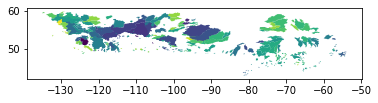

In [4]:
col = "CanESM2_PWM_T100_MUL"
gdf.plot(column=col)